# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2024</br>

Name: Udoy Chowdhury
</br>
Date: 2024-02-15
<br>
<br>
<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
<b>--</b>You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
<b>---</b>Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
<b>--</b>Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
<b>--</b>Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer any prompts in markdown cells.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

Basic usage of database commands in R with SQLite library: https://rsqlite.r-dbi.org/
SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [1]:
import sqlite3
import pandas as pd

# So there is no restrictions when looking at data
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
# Connect to the .db file using sqlite3
db_connection = sqlite3.connect('sql-murder-mystery.db')

In [21]:
# Specify table
table_name = 'solution'

query = f"SELECT * FROM {table_name} LIMIT 1;"
df = pd.read_sql_query(query, db_connection)

# Put column names into a df
column_names = df.columns.tolist()
print(column_names)
 
# Below are tables and their columns
# crime_scene_report
    # ['date', 'type', 'description', 'city']
# drivers_license
    # ['id', 'age', 'height', 'eye_color', 'hair_color', 'gender', 'plate_number', 'car_make', 'car_model']
# person
    # ['id', 'name', 'license_id', 'address_number', 'address_street_name', 'ssn']
# facebook_event_checkin
    # ['person_id', 'event_id', 'event_name', 'date']
# interview
    # ['person_id', 'transcript']
# get_fit_now_member
    # ['id', 'person_id', 'name', 'membership_start_date', 'membership_status']
# get_fit_now_check_in
    # ['membership_id', 'check_in_date', 'check_in_time', 'check_out_time']
# income
    # ['ssn', 'annual_income']
# solution
    # ['user', 'value']

['user', 'value']


We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [6]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:
                               
query = """
SELECT city, COUNT(*) as count
From crime_scene_report
GROUP BY city
ORDER BY count DESC
LIMIT 10;"""
df = pd.read_sql_query(query, db_connection)

print(df)

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below.             
                               

           city  count
0      SQL City      9
1  Murfreesboro      9
2        Toledo      8
3   Jersey City      8
4    Evansville      8
5        Duluth      8
6    Wilmington      7
7     Waterbury      7
8          Reno      7
9    Portsmouth      7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.

In [7]:
#Quick graphing library for a visual for objective 1:
import matplotlib.pyplot as plt

In [12]:
query = """
SELECT type, COUNT(*) as count
From crime_scene_report
GROUP BY type
ORDER BY count DESC
LIMIT 10;"""
df = pd.read_sql_query(query, db_connection)

display(df)

,type,count
0,murder,148
1,arson,148
2,assault,145
3,theft,141
4,bribery,135
5,robbery,134
6,fraud,130
7,blackmail,130
8,smuggling,117


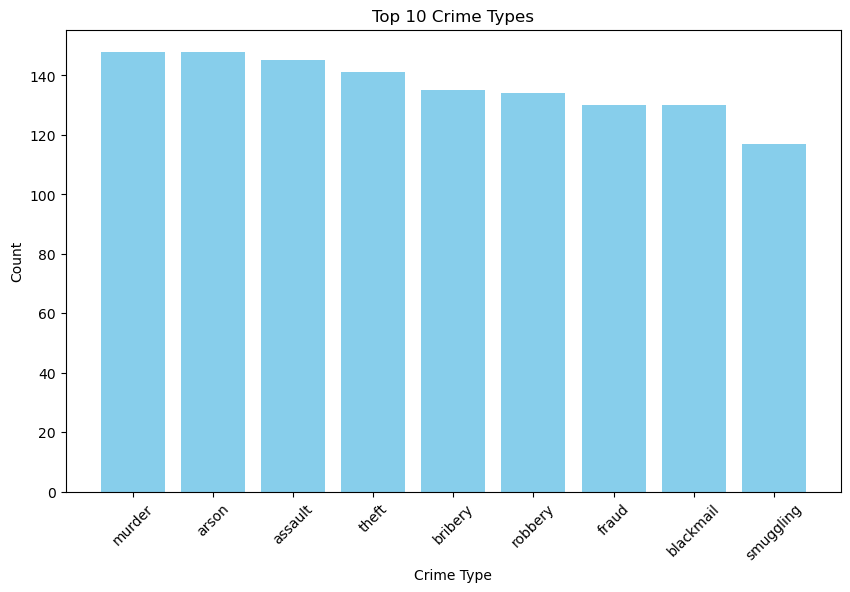

In [9]:
#Graph our results:

# Plotting the bar chart
    # Size
plt.figure(figsize=(10, 6)) 
    # Variables and Color
plt.bar(df['type'], df['count'], color='skyblue')
    # Label and Titles
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 10 Crime Types')
    # Make it look nice by making it readable
plt.xticks(rotation=45)
    # Display
plt.show()

Answer:

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [11]:
query = """
SELECT date, COUNT(*) as count
From crime_scene_report
GROUP BY date
ORDER BY count DESC
LIMIT 10;"""
df = pd.read_sql_query(query, db_connection)

display(df)

,date,count
0,20180115,12
1,20180215,6
2,20170820,6
3,20180430,5
4,20180428,5
5,20180427,5
6,20180425,5
7,20180414,5
8,20180402,5
9,20180331,5


Answer: Definetly the month of April

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [17]:
query = """
SELECT membership_status, COUNT(*) as count
From get_fit_now_member
GROUP BY membership_status
ORDER BY count DESC
LIMIT 10;"""
df = pd.read_sql_query(query, db_connection)

display(df)

,membership_status,count
0,gold,68
1,silver,63
2,regular,53


Answer: Regular

In [18]:
#Disconnect from the database. Always remember to disconnect :) 
db_connection.close()